In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cv_results from the Excel file
cv_results = pd.read_excel('cv_results_2_hidden_layers.xlsx')

# Set consistent style and color palette
sns.set_style("whitegrid")
sns.set_palette("husl")

Validation Curve for Learning Rate for Each Optimizer:
This plot shows the mean test score (model performance) against different learning rates for each optimizer used during the grid search.
Each line represents a different optimizer, and the x-axis represents the learning rate while the y-axis represents the mean test score.
It helps visualize how the choice of learning rate affects the model's performance across different optimizers.

Validation Curve for Batch Size:
This plot shows the mean test score (model performance) against different batch sizes used during the grid search.
The x-axis represents the batch size, and the y-axis represents the mean test score.
It helps visualize how the choice of batch size affects the model's performance.

Boxplot of Validation Scores for Activation Functions:
This plot displays the distribution of mean test scores (model performance) for different activation functions used during the grid search.
Each box represents the interquartile range (IQR) of mean test scores for a specific activation function.
It helps compare the performance variability of different activation functions.

Heatmap for Hyperparameters:
This heatmap illustrates the mean test scores (model performance) for different combinations of hyperparameters, specifically optimizers and activation functions.
Each cell in the heatmap represents the mean test score for a particular combination of optimizer and activation function.
It provides an overview of how different combinations of hyperparameters perform.

Bar Plot of Mean Test Score for Optimizers:
This bar plot displays the mean test score (model performance) for each optimizer used during the grid search.
Each bar represents the average test score achieved by a specific optimizer.
It helps compare the overall performance of different optimizers.

Bar Plot of Mean Test Score for Activation Functions:
This bar plot illustrates the mean test score (model performance) for each activation function used during the grid search.
Each bar represents the average test score achieved by a specific activation function.
It helps compare the overall performance of different activation functions.

Line Plot of Mean Test Score Over Epochs for Each Combination of Hyperparameters:
These line plots visualize how the mean test score (model performance) changes over epochs for each combination of hyperparameters.
Each line represents a different combination of hyperparameters, and the x-axis represents the number of epochs while the y-axis represents the mean test score.
It helps understand the model's learning progress over epochs for different hyperparameter configurations.

Distribution Plot of Fit Time:
This histogram shows the distribution of mean fit times (training times) across different hyperparameter configurations.
It illustrates the range and distribution of training times, providing insights into the computational cost of training the models.
These explanations should help you interpret each plot and understand the insights they provide from the grid search results.

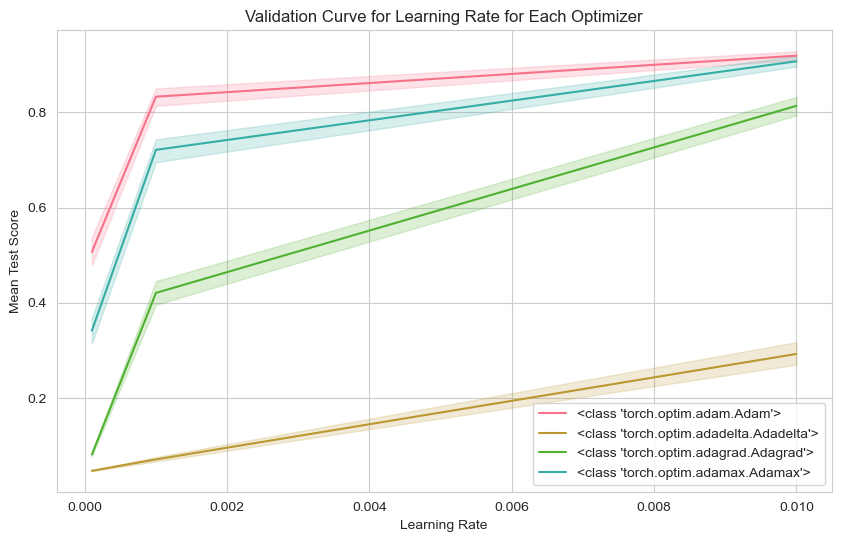

In [46]:
# Plot validation curve for learning rate for each optimizer
fig, axes = plt.subplots(figsize=(10, 6))
for optimizer in cv_results['param_optimizer'].unique():
    optimizer_results = cv_results[cv_results['param_optimizer'] == optimizer]
    sns.lineplot(x='param_optimizer__lr', y='mean_test_score', data=optimizer_results, label=optimizer)
plt.title('Validation Curve for Learning Rate for Each Optimizer')
plt.xlabel('Learning Rate')
plt.ylabel('Mean Test Score')
plt.legend()
plt.show()

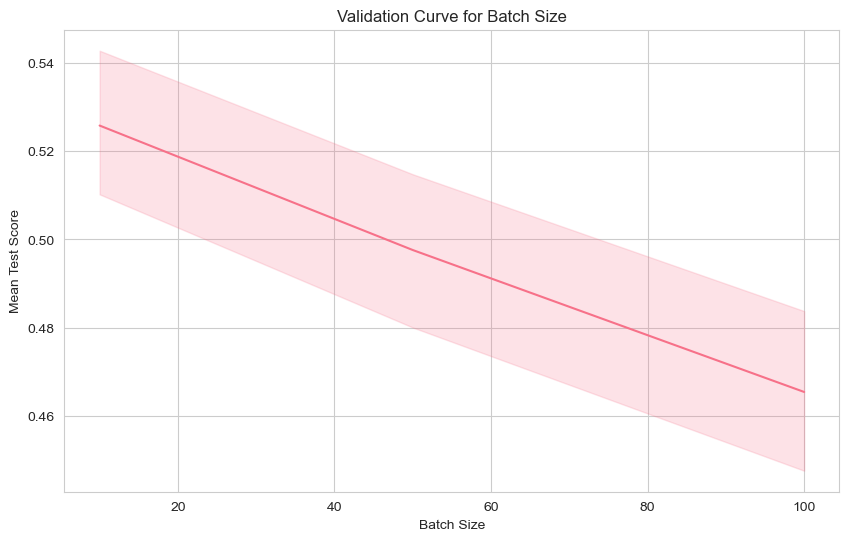

In [47]:
# Plot validation curve for batch size
fig, axes = plt.subplots(figsize=(10, 6))
sns.lineplot(x='param_batch_size', y='mean_test_score', data=cv_results, ax=axes)
axes.set_title('Validation Curve for Batch Size')
axes.set_xlabel('Batch Size')
axes.set_ylabel('Mean Test Score')
plt.show()

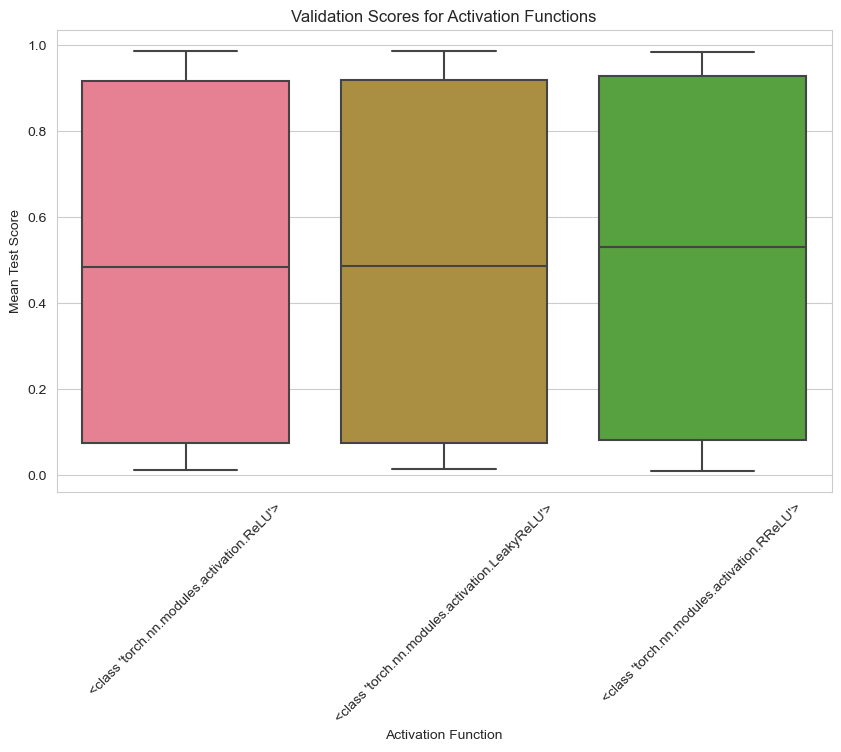

In [48]:
# Boxplot of validation scores for activation functions
fig, axes = plt.subplots(figsize=(10, 6))
sns.boxplot(x='param_module__activation', y='mean_test_score', data=cv_results, ax=axes)
axes.set_title('Validation Scores for Activation Functions')
axes.set_xlabel('Activation Function')
axes.set_ylabel('Mean Test Score')
plt.xticks(rotation=45)
plt.show()

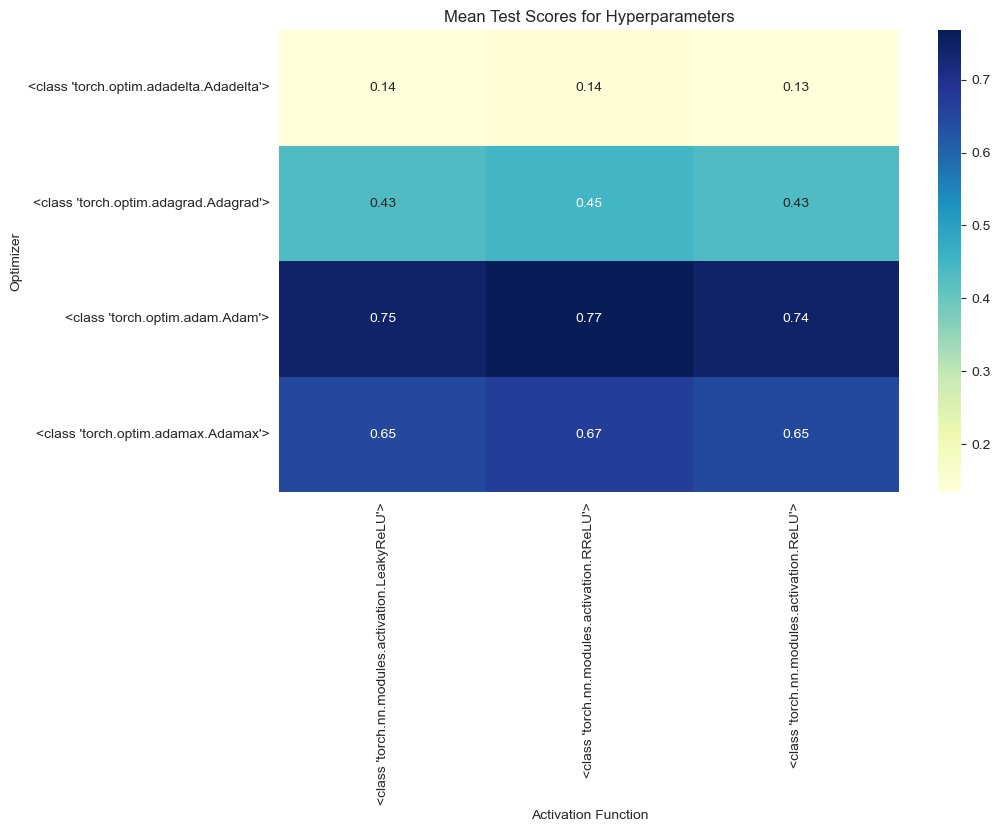

In [49]:
# Heatmap for hyperparameters
pivot_table = cv_results.pivot_table(index='param_optimizer', columns='param_module__activation', values='mean_test_score')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu')
plt.title('Mean Test Scores for Hyperparameters')
plt.xlabel('Activation Function')
plt.ylabel('Optimizer')
plt.show()

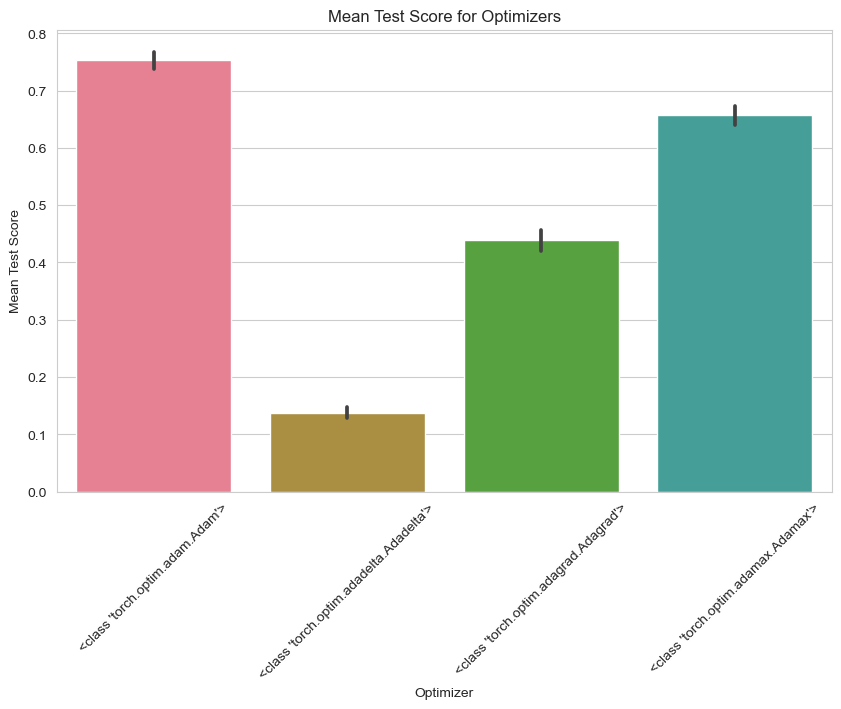

In [50]:
# Bar plot of mean test score for optimizers
fig, axes = plt.subplots(figsize=(10, 6))
sns.barplot(x='param_optimizer', y='mean_test_score', data=cv_results, ax=axes)
axes.set_title('Mean Test Score for Optimizers')
axes.set_xlabel('Optimizer')
axes.set_ylabel('Mean Test Score')
plt.xticks(rotation=45)
plt.show()

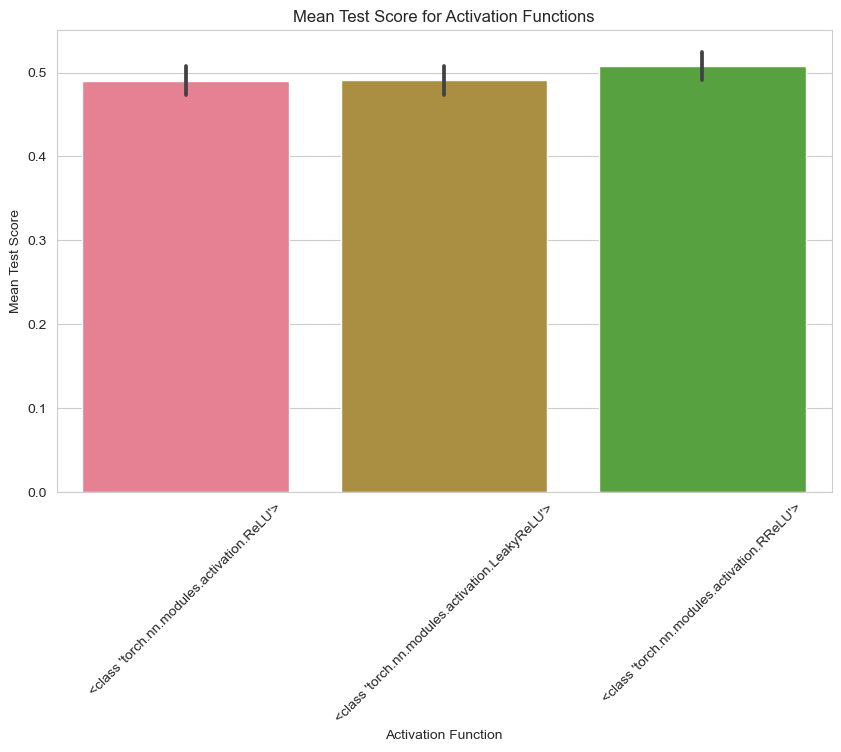

In [51]:
# Bar plot of mean test score for activation functions
fig, axes = plt.subplots(figsize=(10, 6))
sns.barplot(x='param_module__activation', y='mean_test_score', data=cv_results, ax=axes)
axes.set_title('Mean Test Score for Activation Functions')
axes.set_xlabel('Activation Function')
axes.set_ylabel('Mean Test Score')
plt.xticks(rotation=45)
plt.show()

C:\Users\katsantouris\AppData\Local\anaconda3\envs\ccs6611\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


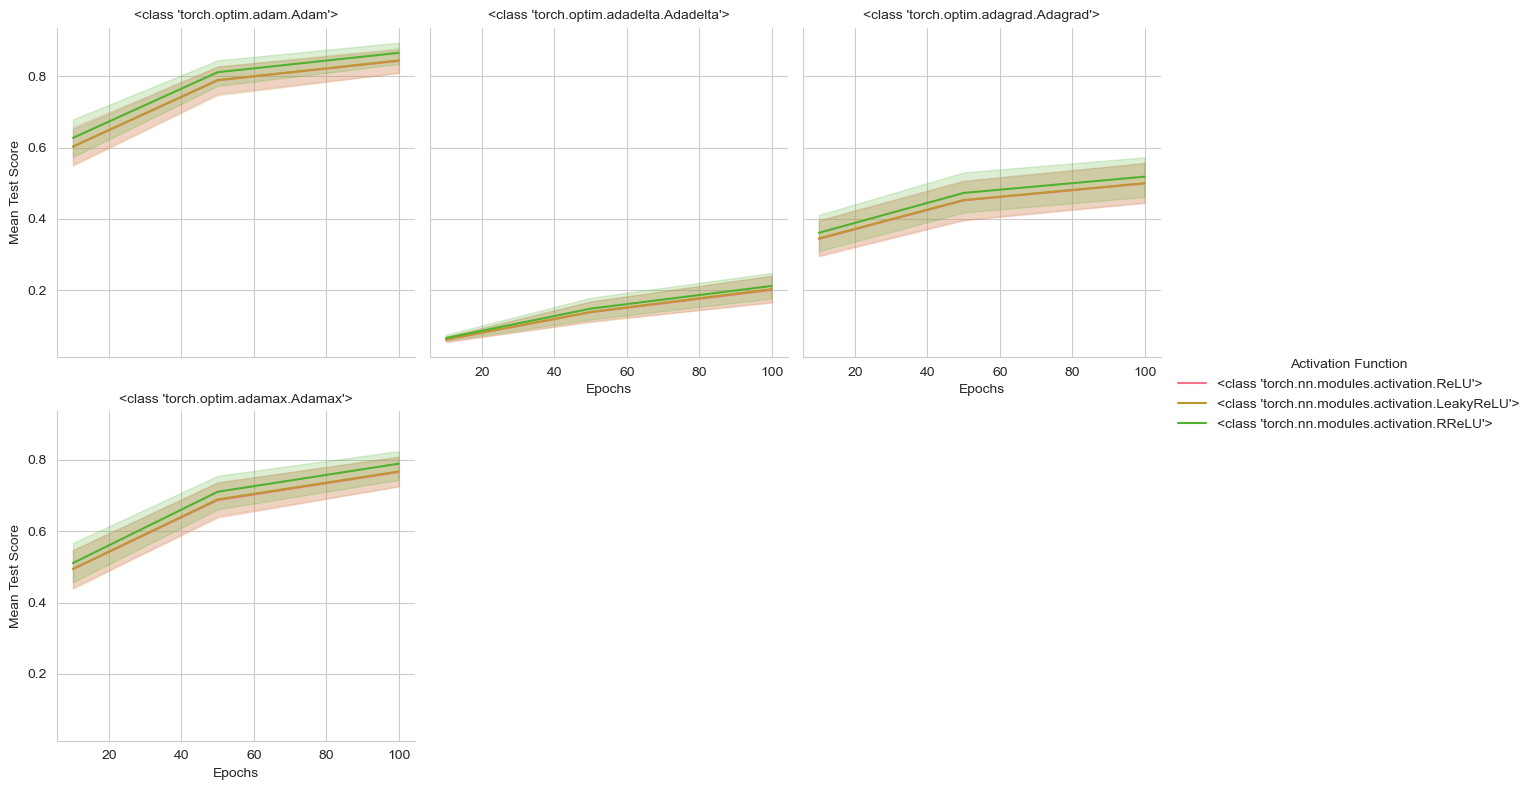

In [52]:
# Line plot of mean test score over epochs for each combination of hyperparameters
g = sns.FacetGrid(cv_results, col='param_optimizer', hue='param_module__activation', col_wrap=3, height=4)
g.map(sns.lineplot, 'param_max_epochs', 'mean_test_score')
g.set_titles(col_template="{col_name}")
g.set_xlabels('Epochs')
g.set_ylabels('Mean Test Score')
g.add_legend(title='Activation Function')
plt.show()

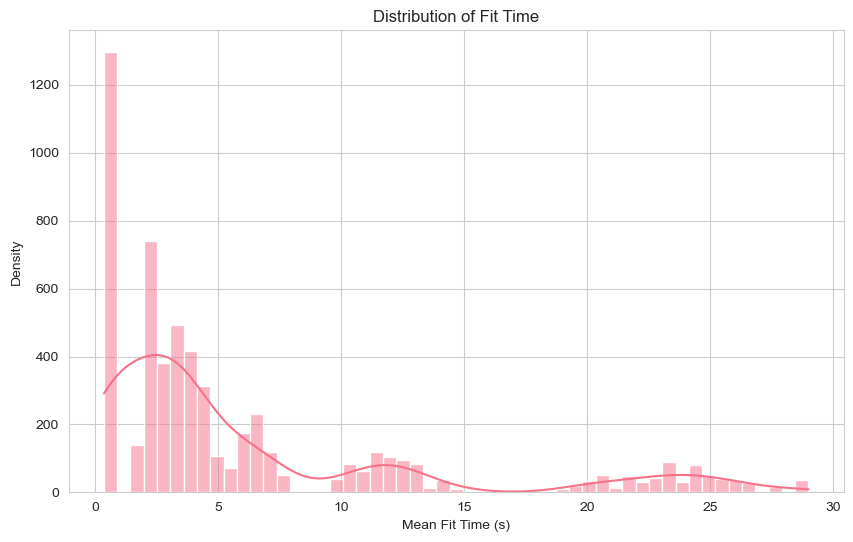

In [53]:
# Distribution plot of fit time
fig, axes = plt.subplots(figsize=(10, 6))
sns.histplot(cv_results['mean_fit_time'], kde=True, ax=axes)
axes.set_title('Distribution of Fit Time')
axes.set_xlabel('Mean Fit Time (s)')
axes.set_ylabel('Density')
plt.show()